In [1]:
import os
from tqdm import tqdm
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\Jelke\PycharmProjects\researchProject\venv\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
folder_path = 'malware'

chunks = []

for filename in tqdm(os.listdir(folder_path)[:3]):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        chunk_iter = pd.read_csv(file_path, chunksize=1000000)
        
        for chunk in chunk_iter:
            chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

print(df)



In [2]:
df = pd.read_csv("fileshuffle_malware_combined.csv")

MemoryError: Unable to allocate 4.85 GiB for an array with shape (2, 325307990) and data type int64

In [ ]:
print(df.head())

In [ ]:
print(df.shape)

In [ ]:
X = df.drop(columns=['label', 'detailed-label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# X_train = X_train.astype(float)
# X_test = X_test.astype(float)

lr_model = HistGradientBoostingClassifier(max_iter=100, random_state=42)
lr_model.fit(X_train, y_train)

In [ ]:
#testing
y_pred = lr_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
background = X_train[:100000]
explainer = shap.Explainer(lr_model, background)
shap_values = explainer.shap_values(background)
shap.summary_plot(shap_values, background, plot_type="bar")


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


honey = pd.read_csv('honey_optimized/honey0.csv')
honey.replace('-', -1, inplace=True)
honey.dropna(inplace=True)
print("Honey data loaded and processed")

df0 = pd.read_csv('filtered/supersampled_detailed_label_0.csv')
print("Loaded df0")
df1 = pd.read_csv('filtered/supersampled_detailed_label_1.csv')
print("Loaded df1")
df2 = pd.read_csv('filtered/supersampled_detailed_label_2.csv')
print("Loaded df2")
df3 = pd.read_csv('filtered/detailed_label_3.csv')
print("Loaded df3")
df4 = pd.read_csv('filtered/supersampled_detailed_label_4.csv')
print("Loaded df4")
df5 = pd.read_csv('filtered/detailed_label_5.csv')
print("Loaded df5")
df6 = pd.read_csv('filtered/supersampled_detailed_label_6.csv')
print("Loaded df6")
df7 = pd.read_csv('filtered/detailed_label_7.csv')
print("Loaded df7")
df8 = pd.read_csv('filtered/supersampled_detailed_label_8.csv')
print("Loaded df8")
df9 = pd.read_csv('filtered/detailed_label_9.csv')
print("Loaded df9")

df_train = pd.concat([df0, df1, df2, df3, df9, df5, df4, df7, df8])
df_train.replace('-', -1, inplace=True)
print("Training data concatenated and processed")

df_train = df_train.sample(frac=1, random_state=42)
print("Training data shuffled")

df_test = df6
print(f"Test data shape before dropping NA: {df_test.shape}")

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)
print(f"Test data shape after dropping NA: {df_test.shape}")

df_test = pd.concat([df_test, honey])

X_train = df_train.iloc[:, :-2]
y_train = df_train.iloc[:, -2]
X_test = df_test.iloc[:, :-2]
y_test = df_test.iloc[:, -2]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data standardized")

print("Training SVM model")
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
print("SVM model trained")

y_pred = model.predict(X_test)
print("Predictions made")

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Honey data loaded and processed
Loaded df0
Loaded df1
Loaded df2
Loaded df3
Loaded df4
Loaded df5
Loaded df6
Loaded df7
Loaded df8
Loaded df9
Training data concatenated and processed
Training data shuffled
Test data shape before dropping NA: (10000, 16)
Test data shape after dropping NA: (10000, 16)
Data standardized
Training SVM model
SVM model trained
Predictions made
Accuracy: 0.7680364526200321
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.71      0.49      1851
           1       0.94      0.78      0.85     10000

    accuracy                           0.77     11851
   macro avg       0.65      0.75      0.67     11851
weighted avg       0.85      0.77      0.79     11851

Confusion Matrix:
[[1319  532]
 [2217 7783]]


In [ ]:
filename = '1.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'trained_on_not2.sav'
model = pickle.load(open(filename, 'rb'))

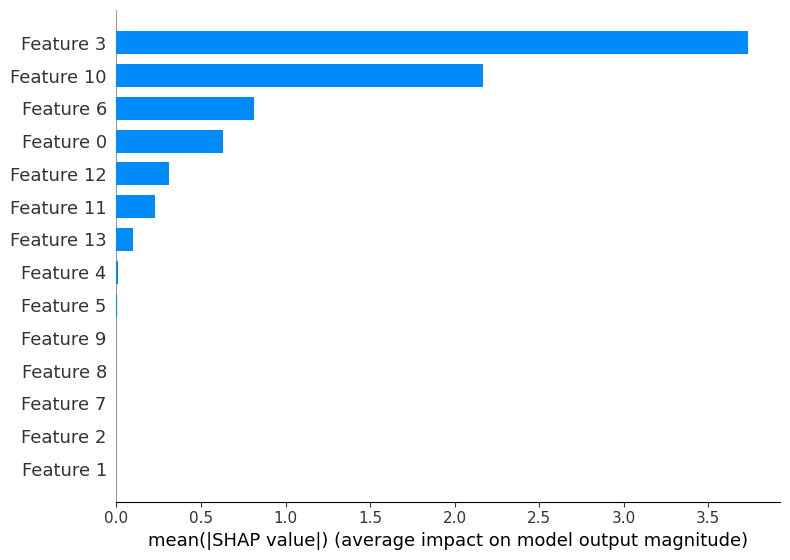

AssertionError: Feature and SHAP matrices must have the same number of rows!

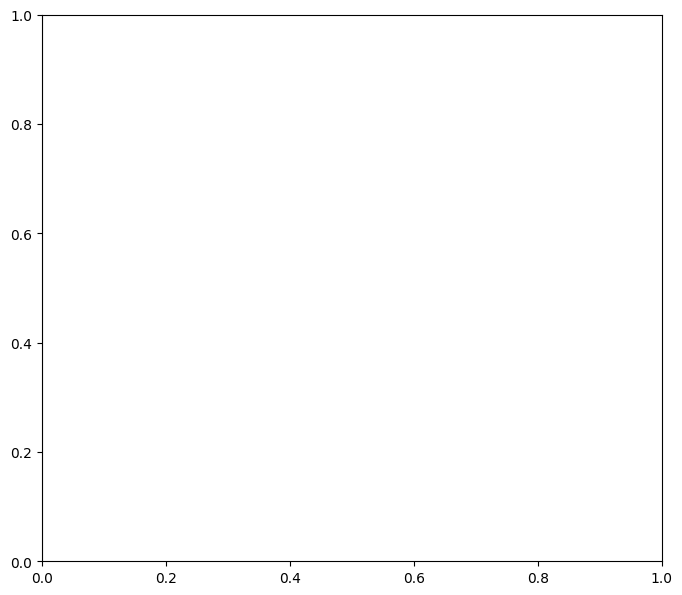

In [22]:
import shap
import matplotlib.pyplot as plt
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test[:100], check_additivity=False)
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=0.3)
plt.show()
shap.summary_plot(shap_values, X_test)
plt.show()
shap.dependence_plot(1, shap_values, X_test)
plt.show()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])
plt.show()